In [1]:
%matplotlib inline
import argparse
import os
path = os.getcwd()
path=path[:path.find('timeseries-WGAN')+15]
import warnings
warnings.simplefilter('ignore')# 警告を非表示
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import sys
sys.path.append(path+"/")
import random
import time
import statsmodels.api as sm
from scipy.stats import norm
import japanize_matplotlib
from scipy.stats import gaussian_kde
import plotly

import torchvision.transforms as transforms
from torchvision.utils import save_image

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable

# 人工データを生成してくれる機械が置いてあるところ
import tsModel
# 学習用のニューラルネットが置いてあるところ
import models

In [2]:
phi_ast=[0.3,-0.4,0.2,-0.5,0.6,-0.1,0.1]
p_ast=len(phi_ast)
mu_ast=0
sigma_ast=2

In [16]:
seed=2**32-1
testT=1000
testData = tsModel.SARIMA(a=phi_ast, N=testT, random_seed=seed, mu=mu_ast, sigma=sigma_ast, randomness="normal")
inno = tsModel.SARIMA(a=phi_ast, N=testT, random_seed=seed, mu=mu_ast, sigma=sigma_ast, randomness="normal", return_innovation=True)

In [17]:
# 可視化してみる
fig = plotly.graph_objs.Figure(
    data=[plotly.graph_objs.Scatter(x=np.linspace(start=1, stop=1000, num=1000), y=testData, name="時系列", yaxis='y'),
          plotly.graph_objs.Scatter(x=np.linspace(start=1, stop=1000, num=1000), y=inno, name="innovation", yaxis='y'),
                ], 
    layout=plotly.graph_objs.Layout(title="AR(7)モデルその"+str(seed),
                legend={"x":1, "y":0.1},
                xaxis={"title":"time","range":[1,1000]},
                yaxis={"title":"value"},
                width = 900,       # 全体のサイズ
                height = 450,
                )
)
plotly.offline.iplot(fig)

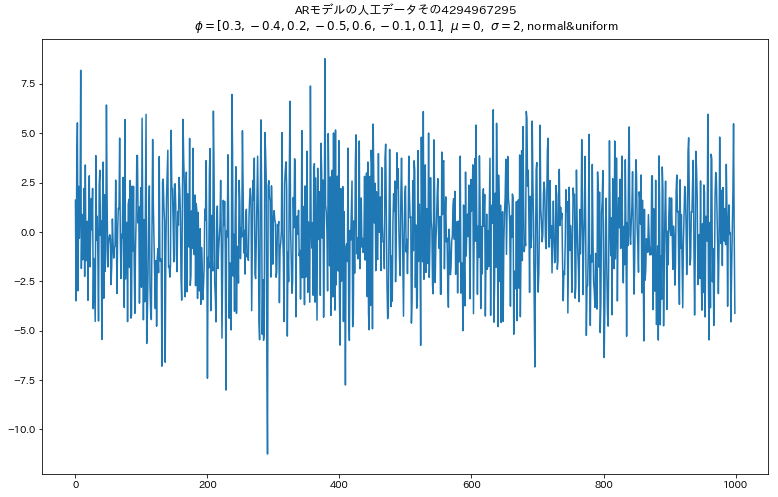

In [24]:
seed=2**32-1
phi_ast = [0.3,-0.4,0.2,-0.5,0.6,-0.1,0.1]
mu_ast = 0
sigma_ast = 2
randomness = "normal&uniform"
Data = tsModel.SARIMA(a=phi_ast, N=testT, random_seed=seed, mu=mu_ast, sigma=sigma_ast, randomness=randomness)
innovation = tsModel.SARIMA(a=phi_ast, N=1000, random_seed=seed, sigma=1, return_innovation=True)
plt.figure(figsize=(13,8))
plt.plot(Data)
plt.title("ARモデルの人工データその{0}".format(seed) +"\n $\phi="+str(phi_ast)+"$,  $\mu="+str(mu_ast)+"$,  $\sigma="+str(sigma_ast)+"$, "+randomness)
plt.savefig(path+"/images/AR{0}モデルの人工データその{1}.png".format(len(phi_ast), seed))